In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pylab import rcParams

from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

### __Предобработка данных__

In [2]:
data = pd.read_csv('./passengers.csv', sep = ',')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# преобразовываем дату в индекс
data.set_index('Month', inplace = True)
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
# преобразуем индекс в объект datetime
data.index = pd.to_datetime(data.index)
data.index[:5]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

### __Построение графиков__

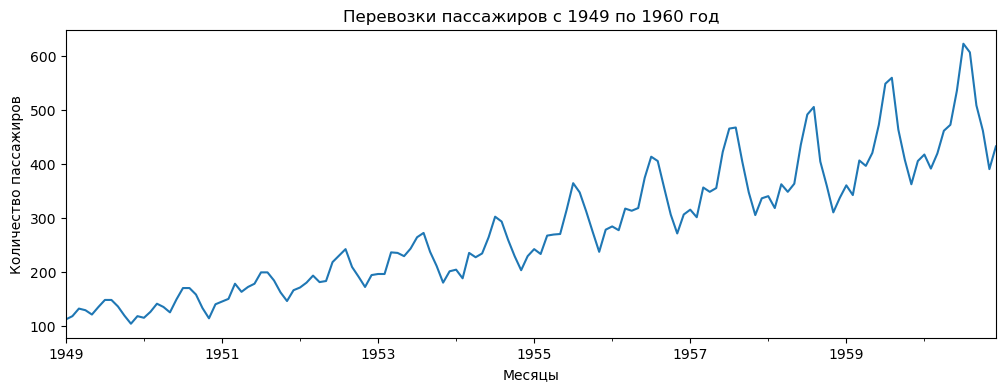

In [6]:
ax = data.plot(figsize = (12,4), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', 
       xlabel = 'Месяцы', 
       ylabel = 'Количество пассажиров');

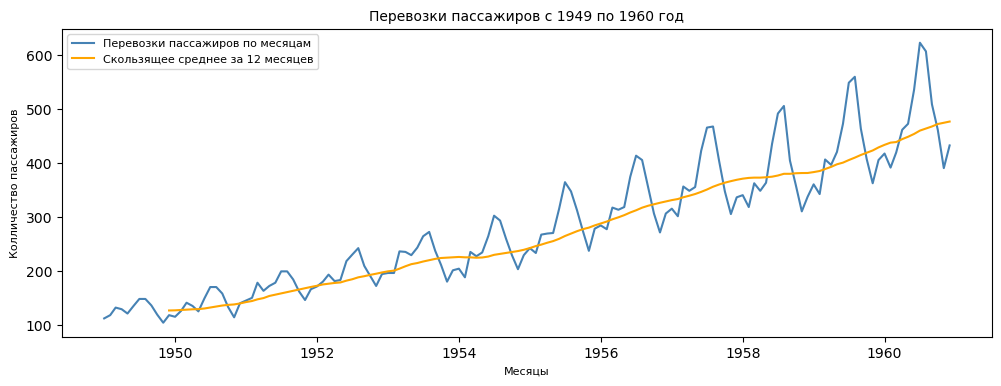

In [7]:
# выведем на графике среднее скользящее
plt.figure(figsize = (12,4))

# зададим кривые
plt.plot(data, label = 'Перевозки пассажиров по месяцам',
         color = 'steelblue')
plt.plot(data.rolling(window = 12).mean(),
         label = 'Скользящее среднее за 12 месяцев',
         color = 'orange')

# добавим легенду
plt.legend(title = '', loc = 'upper left', fontsize = 8)

# добавим информацию по осям
plt.xlabel('Месяцы', fontsize = 8)
plt.ylabel('Колличество пассажиров', fontsize = 8)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 10)

plt.show()

### __Разделим временной ряд на компоненты__

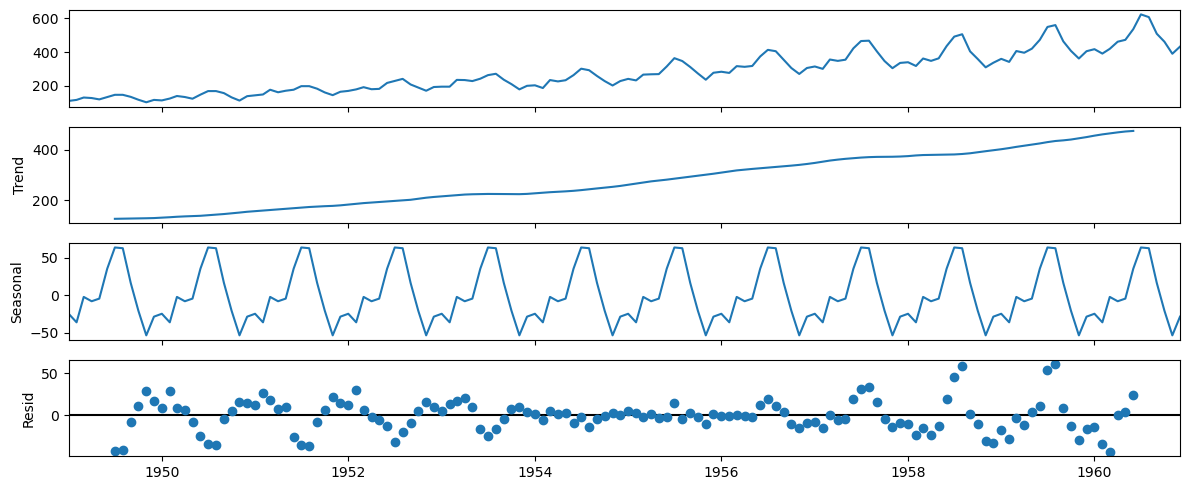

In [8]:
rcParams['figure.figsize'] = 12, 5

decompose = seasonal_decompose(data)
decompose.plot()

plt.show()

### __ARIMA__ 

In [21]:
# разобъем на обучающую и тестовую выборки

train = data[:'1959-12']
test = data['1960-01':]

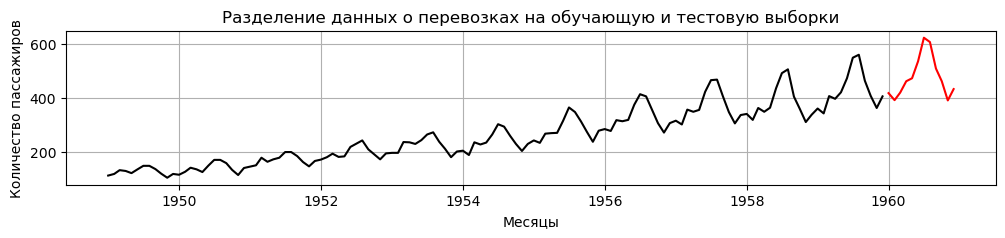

In [31]:
plt.figure(figsize = (12,2))

plt.plot(train, color = 'black')
plt.plot(test, color = 'red')

plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()
plt.show()

In [56]:
# создадим объект модели
model = SARIMAX(train, order = (1, 0, 0), seasonal_order = (0, 1, 0, 12))

# применим метод fit 
result = model.fit()

In [57]:
# делаем прогноз 
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

predictions = result.predict(start, end)
predictions

1960-01-01    425.122965
1960-02-01    404.367656
1960-03-01    465.728922
1960-04-01    453.201830
1960-05-01    474.781659
1960-06-01    524.463883
1960-07-01    598.244171
1960-08-01    607.118374
1960-09-01    509.082517
1960-10-01    451.132796
1960-11-01    404.265567
1960-12-01    445.477339
Freq: MS, Name: predicted_mean, dtype: float64

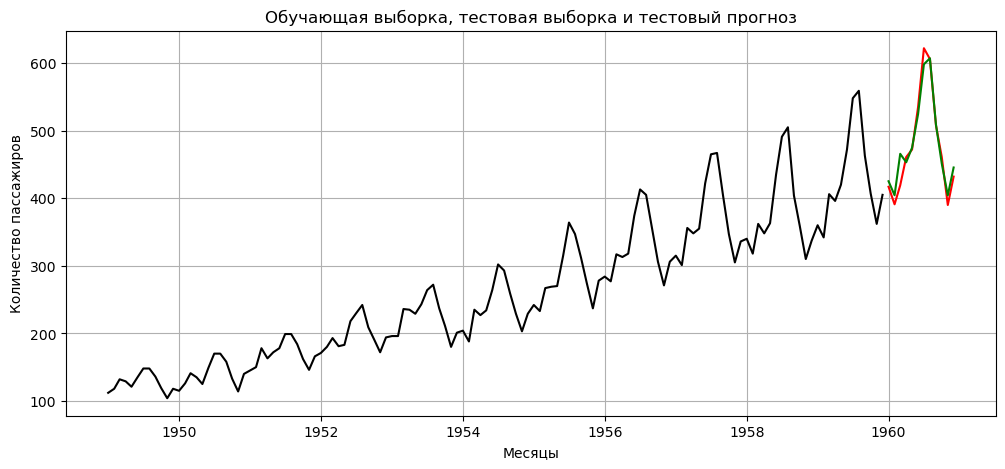

In [58]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [59]:
# расчитаем MSE 
print(mean_squared_error(test, predictions))

# расчитаем RMSE 
print(np.sqrt(mean_squared_error(test, predictions)))

304.7580413940364
17.457320567430628


In [60]:
# зделаем прогноз на 61, 62, 63 годы.
start = len(data)
end = (len(data) - 1) + 3 * 12

# построим прогноз на 3 года вперед
forecast = result.predict(start, end)

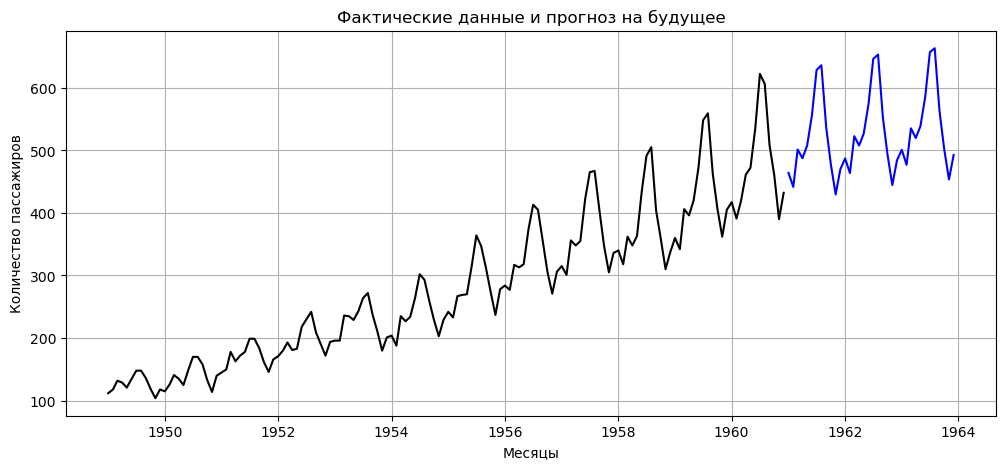

In [62]:
# выведем две кривые (фактические данные и прогноз на будущее)
plt.plot(data, color = 'black')
plt.plot(forecast, color = 'blue')
 
# заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()